## 0. Mount your Google Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import required Libraries

In [30]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import glob
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## 1.1 Define your global variables

In [31]:
stage1 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/*.*')
stage2 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage2/*.*')
stage3 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage3/*.*')
stage4 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage4/*.*')
stage5 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage5/*.*')
stage6 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage6/*.*')
stage7 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage7/*.*')
stage8 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage8/*.*')

## 2. Data Labelling Errors

<ol>
  <li>Explain what kind of errors you found in the dataset.</li>  

  <li>List the total number of images left in each class/stage after the label error handling</li>
</ol>

<br>

<ol>
  <li>Stage 1: <<Number of images>></li>
  <li>Stage 2: <<Number of images>></li>
  <li>Stage 3: <<Number of images>></li>
  <li>Stage 4: <<Number of images>></li>
  <li>Stage 5: <<Number of images>></li>
  <li>Stage 6: <<Number of images>></li>
  <li>Stage 7: <<Number of images>></li>
  <li>Stage 8: <<Number of images>></li>
</ol>

1. The first error that I found in the dataset was that it could not identify an image file that was uploaded to the dataset. I found out which ones these were by putting in an exception in the code so that it prints an error on the image. This was done so that the rest if the code will still be able to run and I can see if it has deleted these errors. From the model prediction, I found out that it is not labeling every image right and the accuracy that I got was around 60 - 65%. This might have been because the dataset had a lot of noise so it was harder to get a higher percentage of accuracy.

2. After handling these errors below are the number of images left in each stage:

Stage 1: 620

Stage 2: 634

Stage 3: 631

Stage 4: 631

Stage 5: 640

Stage 6: 625

Stage 7: 633

Stage 8: 638


## 3. Loading the Data

In [32]:
# this is used to make sure that the image sizes are all 150 * 150
img_size = (150, 150,3)

In [33]:
data = []
labels = []
errors = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}

def load_images(image_paths, label):
    for i in image_paths:
        try:
            image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
            image = np.array(image)
            data.append(image)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {i}: {e}")  # if there were any errors in the format of the images, this is what it would print.
            errors[label] += 1

# Load images for each stage
load_images(stage1, 1)
load_images(stage2, 2)
load_images(stage3, 3)
load_images(stage4, 4)
load_images(stage5, 5)
load_images(stage6, 6)
load_images(stage7, 7)
load_images(stage8, 8)

data = np.array(data)
labels = np.array(labels)


Error loading image /content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/10Stage_1_u2083060..JPEG: cannot identify image file <_io.BytesIO object at 0x7dbcb83e93a0>
Error loading image /content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/1Stage_1_u2083060.JPEG: cannot identify image file <_io.BytesIO object at 0x7dbd4aa36cf0>
Error loading image /content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/2Stage_1_u2083060..JPEG: cannot identify image file <_io.BytesIO object at 0x7dbcb83e93a0>
Error loading image /content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/3Stage_1_u2083060..JPEG: cannot identify image file <_io.BytesIO object at 0x7dbd211dc8b0>
Error loading image /content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/4Stage_1_u2083060..JPEG: cannot identify image file <_io.Byte

In [34]:
# Visualize label distribution
print("Label distribution before handling errors:")
print(np.unique(labels, return_counts=True))

Label distribution before handling errors:
(array([1, 2, 3, 4, 5, 6, 7, 8]), array([620, 634, 631, 631, 642, 625, 633, 638]))


In [35]:
# Verify label distribution after handling errors, this is where I can also see the amount of data left at each stage.
print("Label distribution after handling errors:")
print(np.unique(labels, return_counts=True))

Label distribution after handling errors:
(array([1, 2, 3, 4, 5, 6, 7, 8]), array([620, 634, 631, 631, 642, 625, 633, 638]))


## 4. Split the data
<br>

Split the data into training, validation and testing dataset using Startification, ensuring equal class distribution.

Choose appropriate values of training, validation and testing datasets.

Display total number of images in each dataset.

In [36]:
# Split the data into training, validation, and testing datasets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=786, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=786, stratify=y_temp)

# Display total number of images in each dataset
print("Total training instances: " + str(len(y_train)))
print("Train Data: " + str(np.unique(y_train, return_counts=True)))

print("\nTotal validation instances: " + str(len(y_val)))
print("Validation Data: " + str(np.unique(y_val, return_counts=True)))

print("\nTotal testing instances: " + str(len(y_test)))
print("Test Data: " + str(np.unique(y_test, return_counts=True)))

Total training instances: 4043
Train Data: (array([1, 2, 3, 4, 5, 6, 7, 8]), array([496, 507, 505, 505, 514, 500, 506, 510]))

Total validation instances: 808
Validation Data: (array([1, 2, 3, 4, 5, 6, 7, 8]), array([ 99, 102, 101, 101, 102, 100, 101, 102]))

Total testing instances: 203
Test Data: (array([1, 2, 3, 4, 5, 6, 7, 8]), array([25, 25, 25, 25, 26, 25, 26, 26]))


## 5. Pre-process Dataset

**Reshaping the dataset**

In [37]:
# This part of the code is where i need to reshape the dataset
print("\n\nBefore Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 150, 150, 3))
X_val = X_val.reshape((X_val.shape[0], 150, 150, 3))
X_test = X_test.reshape((X_test.shape[0], 150, 150, 3))
print("After Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



Before Reshaping the shape of train and test dataset:
(4043, 150, 150, 3)
(808, 150, 150, 3)
(203, 150, 150, 3)
After Reshaping the shape of train and test dataset:
(4043, 150, 150, 3)
(808, 150, 150, 3)
(203, 150, 150, 3)


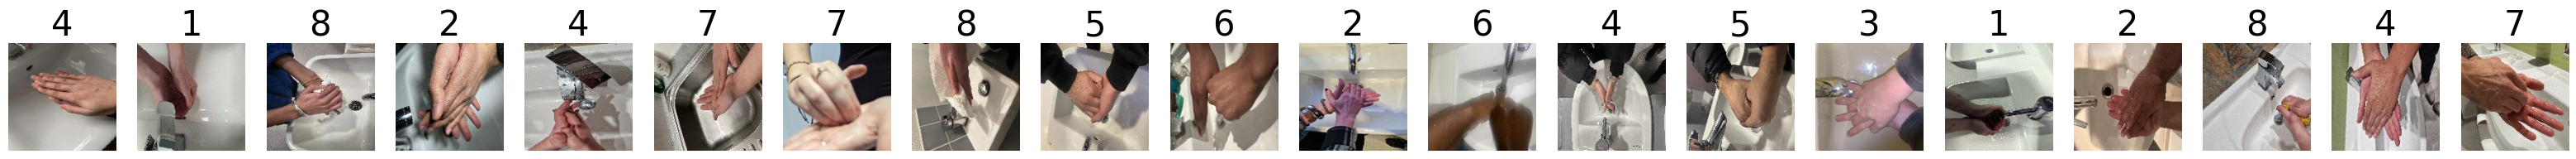

In [38]:
# This is where we can visualise the data to see if it has made the data all the same size.
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = X_train[i]
    label = y_train[i]

    image = row
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

**Normalising the image data**

In [39]:
# first we need to normalise the image data,
# Convert the array to float32 as opposed to uint8
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
X_train /= 255
X_val /= 255
X_test /=  255


In [40]:
# Converting labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [41]:
# Converting the numerical labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

**Categorise/ Encoding labels**

In [42]:
# Number of classes in the dataset
NUM_CLASSES = 10

print("Before label conversion to categorical: ", y_train[0:5]) # The format of the labels before conversion
y_train  = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)

print("Before label conversion to categorical: ", y_val[0:5]) # The format of the labels before conversion
y_val  = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)

print("After label conversion to categorical: ", y_train[0:5]) # The format of the labels after conversion
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

Before label conversion to categorical:  [4 1 8 2 4]
Before label conversion to categorical:  [6 7 3 2 4]
After label conversion to categorical:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [43]:
# Define learning rate scheduling for the
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)

## 6. Creating a Convolutional Neural Network Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (
    Conv2D,
    MaxPool2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
)


model = Sequential()
model.add(Conv2D(64, (5, 5), strides=1, padding="same", activation="relu", input_shape=img_size))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))  # Added layer
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=NUM_CLASSES, activation="softmax"))

## 7. Data Augmentation

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

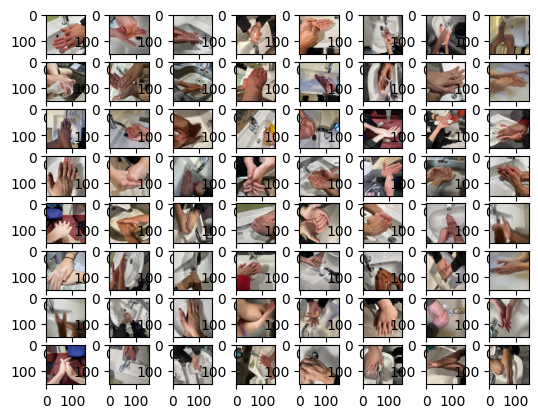

In [46]:
# now looking at the batch size as this would improve the accuracy of my model
import matplotlib.pyplot as plt
import numpy as np

batch_size = 64    #  I chose to use a batch size of 64 as this worked the best with my model
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [47]:
# fitting data to the generator
datagen.fit(X_train)

In [48]:
# summarizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      4864      
                                                                 
 batch_normalization_4 (Bat  (None, 150, 150, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 batch_normalization_5 (Bat  (None, 75, 75, 64)        256       
 chNormalization)                                                
                                                      

The above summary shows that my model has 4 conv2d layers and the same with batch normalization. I have added batch normalization after every layer of my model to make it more randomized and have found out that it also makes my model more accurate.

## 8. Train Model

In [49]:
# to train the model we need to compile the model first
# I decided to go with the adam optimizer as this worked pretty well with my model.

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=lr_schedule),
    metrics=["accuracy"]
)

In [50]:
# adding early stopping to my model as this further prevents overfitting when training my model by stoping the training early.

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [51]:
# now training the model
history = model.fit(img_iter,
          epochs=50,
          steps_per_epoch=len(X_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/50
63/63 [==============================] - 29s 412ms/step - loss: 3.2297 - accuracy: 0.1437 - val_loss: 2.9978 - val_accuracy: 0.1324
Epoch 2/50
63/63 [==============================] - 25s 389ms/step - loss: 2.9247 - accuracy: 0.1692 - val_loss: 2.9660 - val_accuracy: 0.1448
Epoch 3/50
63/63 [==============================] - 23s 367ms/step - loss: 2.8440 - accuracy: 0.1813 - val_loss: 2.8975 - val_accuracy: 0.1559
Epoch 4/50
63/63 [==============================] - 25s 399ms/step - loss: 2.7432 - accuracy: 0.1922 - val_loss: 2.7621 - val_accuracy: 0.1658
Epoch 5/50
63/63 [==============================] - 23s 363ms/step - loss: 2.6691 - accuracy: 0.2080 - val_loss: 2.7275 - val_accuracy: 0.1423
Epoch 6/50
63/63 [==============================] - 26s 407ms/step - loss: 2.5964 - accuracy: 0.2125 - val_loss: 2.5954 - val_accuracy: 0.1955
Epoch 7/50
63/63 [==============================] - 25s 401ms/step - loss: 2.5148 - accuracy: 0.2340 - val_loss: 2.7514 - val_accuracy: 0.1733

## 9. Evaluate the Model

In [52]:
# testing the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy))

7/7 [==============================] - 0s 13ms/step - loss: 1.8354 - accuracy: 0.6010
Test accuracy: 0.60


Testing shows that my model has got near 60 - 65 % accuracy. This is pretty good considering the large dataset that i had to deal with and considering human errors that could have been developed in the data acquisition.

In [53]:
#### testing model on unseen test images
y_pred = model.predict(X_test)
# Convert class attribute back to its origional form, 0,1 from categorical [1. 0., 0. 1.]
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

#Accuracy of the model on test dataset
print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))


7/7 [==============================] - 0s 11ms/step
[5 2 4 8 4 4 3 7 3 6 6 2 5 8 3 7 2 2 4 6 4 3 8 2 5]
[8 3 3 8 3 4 3 7 4 3 6 2 3 8 3 7 2 5 5 6 4 3 8 2 5]
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        25
           2       0.55      0.48      0.51        25
           3       0.33      0.56      0.42        25
           4       0.46      0.48      0.47        25
           5       0.59      0.77      0.67        26
           6       0.90      0.36      0.51        25
           7       0.76      0.62      0.68        26
           8       0.80      0.62      0.70        26

    accuracy                           0.60       203
   macro avg       0.65      0.60      0.60       203
weighted avg       0.65      0.60      0.60       203

[[23  1  0  0  1  0  0  0]
 [ 2 12  5  2  3  0  1  0]
 [ 0  2 14  7  0  0  2  0]
 [ 1  3  7 12  1  0  1  0]
 [ 0  2  2  0 20  1  0  1]
 [ 1  0  6  2  5  9  0  2]
 [ 1  1  3  1  3  0 16  1]
 [ 0

**Analysis:**

Class 7 and Class 8 have high precision, recall, and F1-scores, indicating good performance for these classes.
Class 3 has a relatively lower precision, recall, and F1-score, suggesting challenges in correctly classifying this class.
The overall model performance is decent, but there is room for improvement, especially for certain classes.   

**Key Observations of confusion matrix:**

Class 7 and Class 8: Both classes have high diagonal values, indicating accurate predictions.
Class 7 was misclassified as Class 6 three times.

Class 3: Class 3 has misclassifications with other classes, contributing to lower performance.
It was misclassified as Class 1, Class 2, and Class 6.

Class 5: Class 5 has mostly correct predictions (20 true positives) but with a few misclassifications as Class 2 and Class 6.

Class 6:
Class 6 has misclassifications as Class 3, Class 5, and Class 7

## 10. Training Curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


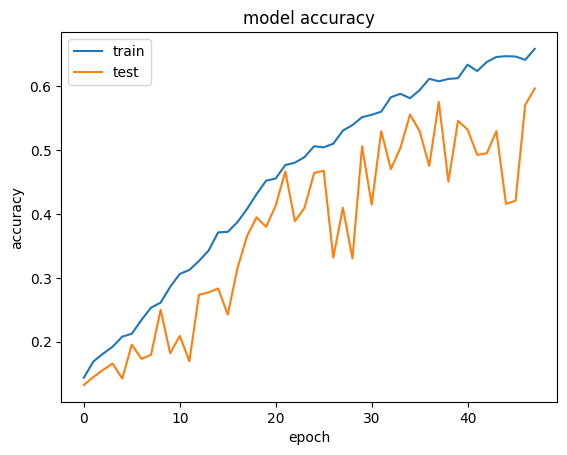

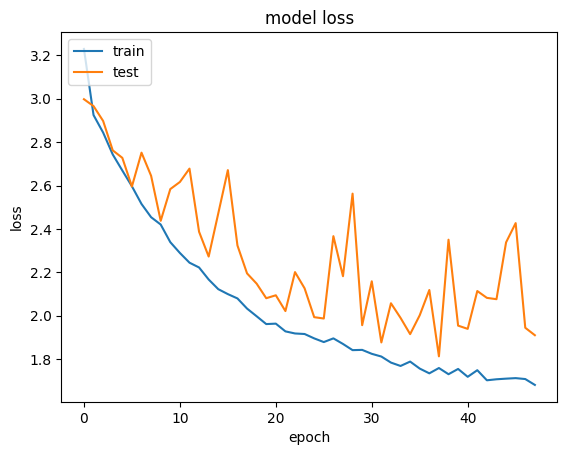

In [54]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label ="Validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label ="Validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The above graphs indicate that my models accuracy shows a steady increase in training data but for testing data it is fluctuating a lot. This is similar for model loss as the training data shows a steady decrease but the ttesting data fluctuates. i had to do a lot of trial and error to get my accuracy this high and my performance this good.

## 11. Make some pridiction using the trained Model

In [55]:
from tensorflow.keras.preprocessing import image

def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=img_size)
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(index).title()), size=18, color='red')
    plt.imshow(img_array)


1/1 [==============================] - 0s 23ms/step


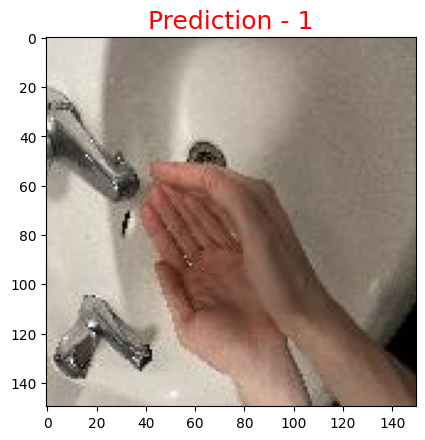

In [56]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Assessment 2/CHS2406_Coursework2_Data_Repository/Stage1/10_Stage_1_u2180421.jpg', model)

The above image prediction is correct and it shows that my model is accurate enough to predict a lot of the dataset correctly.